# Fake pictures detector 

## Topic

In this project, I will be going through many real people pictures and fake photoshop made pictures, using dimensionality reduction technique, more specifically PCA, reduce the dimendion of the pictures and then apply classification algorithms on them. The row pictures are downloaded and transformed into arrays, only one color channel is kept with the values at each pixel stored into an array, PCA is then apply twice, first time to reduce the photo matrices into their 3 principal components and second to reduce those 3 components in to one principal components which contains 50% of the information in the picture.
Different classification algorithms are then applied on the decomposed matrices to try and predict whether a certain picture is real or fake.

## Objectives

- Reduce the dimension of the photos
- Apply classification algorithms to determine whether a picture is real or fake

## Summary

- Importing Libraries
- Quick look at the dataset
- Data pre-processing
- Logistic Regression
- Naive Bayes Classifier
- Support Vector Machines
- XGBoost Classifier
- K Nearest Neighbours
- Decision Tree Classifier

## Importing libraries

In [1]:
import numpy as np
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import os
import matplotlib.image as mplib 
import pandas as pd
from sklearn.decomposition import PCA
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import  classification_report, confusion_matrix,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost 
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

c:\users\imane\appdata\local\programs\python\python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## The Dataset
The dataset is two folders containing real images of different people and photoshop made images.  

In [2]:
# get two lists containing the names of the files
list_real = os.listdir(r"C:\Users\imane\OneDrive\Desktop\eigenfaces\training_real")
list_fake = os.listdir(r"C:\Users\imane\OneDrive\Desktop\eigenfaces\training_fake")

In [3]:
print(len(list_real))

1081


In [4]:
print(len(list_fake))

960


I have 1081 images of real people and 960 images of photoshoped fake images.

In [5]:
# get paths to the image folders
path_real = r"C:\Users\imane\OneDrive\Desktop\eigenfaces\training_real"
path_fake = r"C:\Users\imane\OneDrive\Desktop\eigenfaces\training_fake"

In [6]:
# get a list of the paths to real images
pics_real = [os.path.join(path_real, i) for i in list_real]

In [7]:
# get a list of the paths to fake images
pics_fake = [os.path.join(path_fake, i) for i in list_fake]

In [8]:
# get a list of the paths to the real photos
paths_real = [os.path.join(path_real,i) for i in list_real]

In [9]:
# get a list of the paths to the fake photos
paths_fake = [os.path.join(path_fake,i) for i in list_fake]

In [10]:
arrays_real = []
for p in paths_real:
    img = Image.open(p)
    array = np.asarray(img)
    arrays_real.append(array)

In this part, I opened every pictures in the real picture folder, transformed it into an array and stored all the arrays in a list.

In [12]:
arrays_fake = []
for p in paths_fake:
    img = Image.open(p)
    array = np.asarray(img)
    arrays_fake.append(array)

I did the same for fake images.

In [14]:
img = arrays_real[1]

In [15]:
# get the shape of images
img.shape

(600, 600, 3)

The images are in shape 600*600*3 , meaning length and width of 600 times the three color channels.

In [16]:
# split the picture into its 3 channels
blue,green,red = cv2.split(img)

Here I plotted the picture in its 3 channels red blue and green.

## Data Pre-processing

In [17]:
b_real = []
g_real = []
r_real = []
for a in arrays_real:
    blue, green, red = cv2.split(a)
    b_real.append(blue)
    g_real.append(green)
    r_real.append(red)


In [18]:
b_fake = []
g_fake = []
r_fake = []
for a in arrays_fake:
    blue, green, red = cv2.split(a)
    b_fake.append(blue)
    g_fake.append(green)
    r_fake.append(red)

In the above, I iterated through every picture array, split it into the three channels and stored each channels information into a list.

I then printed channel red for the real pictures and channel green for the fake pictures, the lists contains pixel data in the subsequant channel.

In [21]:
r_real[0] = r_real[0]/255
r_real[0]

array([[0.36470588, 0.34901961, 0.32156863, ..., 0.54509804, 0.53333333,
        0.54509804],
       [0.30980392, 0.30588235, 0.30980392, ..., 0.54117647, 0.5254902 ,
        0.5372549 ],
       [0.24313725, 0.2627451 , 0.29019608, ..., 0.51764706, 0.49803922,
        0.51372549],
       ...,
       [0.41960784, 0.43529412, 0.45882353, ..., 0.1254902 , 0.12156863,
        0.1254902 ],
       [0.41176471, 0.42745098, 0.44705882, ..., 0.12156863, 0.12156863,
        0.12941176],
       [0.42745098, 0.44705882, 0.46666667, ..., 0.11764706, 0.12941176,
        0.12941176]])

While experimenting with one picture, I first regularised the pixel data by deviding the array by 255.

In [22]:
pca_3 = PCA(n_components=3)
pca_3.fit_transform(r_real[0])

array([[ 3.16414896,  3.48667185,  2.68854441],
       [ 3.18294632,  3.47764011,  2.65265939],
       [ 3.18803467,  3.48657433,  2.60465319],
       ...,
       [-1.53686586,  2.2624265 , -1.47116219],
       [-1.45086557,  2.31215672, -1.46733577],
       [-1.37750035,  2.3594457 , -1.45624457]])

I then applied PCA with 3 components on the regularised array.

In [23]:
#  ration of variance -  identify how significant is each principal component 
print(pca_3.explained_variance_ratio_)

[0.24249098 0.19232581 0.14318063]


Here I printed the eigenvalues of the first 3 components, we see that the first principal components only holds 0,24 of the information in the data.

In [24]:
print(pca_3.singular_values_)

[39.44850311 35.13189002 30.31271671]


In [25]:
t = pca_3.transform(r_real[0])
t

array([[ 3.16414896,  3.48667185,  2.68854441],
       [ 3.18294632,  3.47764011,  2.65265939],
       [ 3.18803467,  3.48657433,  2.60465319],
       ...,
       [-1.53686586,  2.2624265 , -1.47116219],
       [-1.45086557,  2.31215672, -1.46733577],
       [-1.37750035,  2.3594457 , -1.45624457]])

In [26]:
# Get the principal components (eigenvectors)
pca_3.components_

array([[-0.0047902 , -0.0059443 , -0.00633799, ...,  0.02503156,
         0.02481148,  0.02476085],
       [ 0.06456074,  0.06529843,  0.06761094, ...,  0.05572289,
         0.05612572,  0.05663146],
       [-0.05000346, -0.04721452, -0.04359481, ...,  0.04547275,
         0.04415632,  0.0429455 ]])

In [27]:
pca_1 = PCA(n_components = 1)
pca_1.fit_transform(t)
pca_1.explained_variance_ratio_

array([0.41953645])

Then I applied a second PCA on my 3 principal components to try and reduce the picture into only one array. We see that the only principal components holds 50% of the information in the data, which is not bad considering how much dementiality reduction has been done.

In [28]:
pca_3 = PCA(n_components = 3)
pca_1 = PCA(n_components = 1)

Here I created two PCAs one with 3 princiapl components and the second with 1.

In [29]:
features_real = []
for a in r_real:
    a = a/255
    t = pca_3.fit_transform(a)    
    tt = pca_1.fit_transform(t)    
    features_real.append(tt)

Choosing only the red channel, I regularised every picture array, transformed it with PCA and kept its three components, reapplied PCA and got only the one principal component.

In [31]:
# Transform the features list into an array
features_real = np.array(features_real)

In [32]:
# get the shape of the array
features_real.shape

(1081, 600, 1)

In [33]:
# keep only two dimensions in the array
features_real = np.squeeze(features_real)

In [34]:
features_real

array([[ 1.24084273e-02,  1.24821424e-02,  1.25020968e-02, ...,
        -6.02692496e-03, -5.68966891e-03, -5.40196216e-03],
       [ 7.30636659e+00,  7.21360264e+00,  7.02718064e+00, ...,
         4.41739845e+00,  4.44166430e+00,  4.50502853e+00],
       [ 5.31470470e+00,  5.30138942e+00,  5.31749393e+00, ...,
         3.40083155e+00,  3.38134085e+00,  3.37459692e+00],
       ...,
       [-4.50300413e+00, -4.50300413e+00, -4.50300413e+00, ...,
        -3.89060792e+00, -4.01996381e+00, -4.02535108e+00],
       [ 4.48359948e+00,  4.46362139e+00,  4.46088475e+00, ...,
        -2.15519021e+00, -2.14926006e+00, -2.14464395e+00],
       [-4.26687830e+00, -4.26609212e+00, -4.25940654e+00, ...,
        -1.46389829e+00, -1.35613416e+00, -1.35867978e+00]])

In [35]:
# Transform the array into a pandas dataframe
df_real = pd.DataFrame(features_real)

In [36]:
# Adding the target column, 1 for real
df_real["target"] = 1

In the above, I transformed every picture into one array line and stored it in a pandas dataframe, then added the target feature which is 1 for real pictures and 0 for fake pictures. Below I did the same for fake pictures.

In [38]:
features_fake = []
for a in r_fake:
    a = a/255
    t = pca_3.fit_transform(a)    
    tt = pca_1.fit_transform(t)    
    features_fake.append(tt)

In [114]:
features_fake = np.array(features_fake)
features_fake = np.squeeze(features_fake)
df_fake = pd.DataFrame(features_fake)
df_fake["target"] = 0

In [40]:
df = df_real.append(df_fake)

C:\Users\imane\AppData\Local\Temp/ipykernel_1504/1117223117.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_real.append(df_fake)


I added the real pictures dataframe to the fake pictures dataframe.

In [41]:
df = df.sample(frac = 1)

Then shuffled the rows with target 1 with eows with target 0.

In [42]:
df

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,target
28,3.287063,3.342324,3.462696,3.608864,3.683111,3.764133,3.824438,3.902464,3.929437,4.014838,...,-1.747367,-1.925979,-1.949774,-1.889547,-1.888047,-1.908365,-1.980823,-2.026748,-2.095880,1
309,1.237257,2.167152,2.047360,1.759997,1.946670,2.011273,1.801660,1.773356,1.499285,1.616764,...,6.913927,6.864207,6.892620,6.892296,6.969018,6.990944,6.954823,6.998709,7.072531,1
665,1.926135,1.997347,2.144765,2.255001,2.329303,2.377606,2.375842,2.345305,2.293009,2.263539,...,5.339002,5.384694,5.354743,5.339224,5.270135,5.219827,5.204131,5.161036,4.692395,1
711,-4.979350,-5.082941,-5.122791,-5.082695,-5.012335,-5.008449,-4.907021,-4.786197,-4.735909,-4.767556,...,2.610620,2.610986,2.603435,2.527036,2.500861,2.457423,2.458748,2.412879,2.325164,0
419,-2.551828,-2.557496,-2.560609,-2.568806,-2.569560,-2.567642,-2.569066,-2.556792,-2.562415,-2.544865,...,3.873017,3.866005,3.859453,3.853207,3.876146,3.923818,3.976807,4.068387,4.167744,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,5.366236,5.266136,5.150376,5.089555,5.065846,5.044894,5.025801,5.013602,4.936835,4.830000,...,5.404031,5.355861,5.346964,5.305434,5.273613,5.247769,5.221568,5.172945,5.146442,0
219,6.662252,6.675446,6.744643,6.847190,6.969999,7.052656,7.191046,7.309616,7.439942,7.561720,...,-2.124505,-2.125954,-2.116591,-2.107513,-2.109763,-2.109634,-2.124127,-2.146639,-2.155785,0
98,3.274436,3.290791,3.328279,3.375026,3.389203,3.391874,3.452699,3.542644,3.619321,3.685639,...,0.798853,0.799844,0.806401,0.817191,0.804972,0.778306,0.768206,0.772035,0.773125,1
105,4.694958,4.659804,4.658375,4.641747,4.642281,4.655392,4.682671,4.686828,4.716162,4.688738,...,1.524015,1.536951,1.523328,1.547623,1.544236,1.512267,1.496291,1.526792,1.533531,0


In [43]:
# Separate the target from the dataset
target = df['target'].copy()
target

28     1
309    1
665    1
711    0
419    1
      ..
212    0
219    0
98     1
105    0
43     0
Name: target, Length: 2041, dtype: int64

In [44]:
df = df.drop(columns = ["target"])

In [45]:
# split the dataset for training and testing samples
X_train, X_test, y_train, y_test = train_test_split( df, target, test_size=0.2, random_state=42)

<BarContainer object of 2 artists>

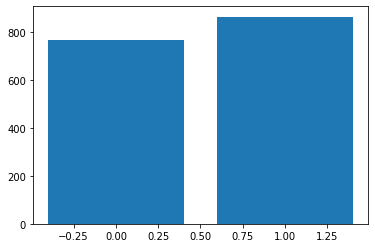

In [46]:
cat_train = pd.DataFrame(y_train)
cat_train["count"] = 1
cat_train = cat_train.groupby("target").sum().reset_index()
x = cat_train["target"]
y = cat_train["count"]
plt.bar(x, y)

Here I just wanted to make sure that the amount of real photos in the training set is not too far from the number of fake photos.

## Logistic Regression

In [47]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

c:\users\imane\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\imane\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

c:\users\imane\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\imane\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

c:\users\imane\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\imane\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

c:\users\imane\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\imane\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

c:\users\imane\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

running the grid search to find best parameters for the base line model.

In [48]:
# Get best parameters
logreg_cv.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [49]:
# Fit the data
lr = LogisticRegression(C= 0.001, penalty='l2')
lr.fit(X_train, y_train)

c:\users\imane\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.001)

In [50]:
# accuracy on training
lr.score(X_train, y_train)

0.5594362745098039

In [51]:
lr_pred = lr.predict(X_test)

In [52]:
# Accuracy on test set
acc_lr = lr.score(X_test, y_test)
acc_lr

0.5061124694376528

In [53]:
f1_lr = f1_score(y_test, lr_pred)
f1_lr

0.61003861003861

In [54]:
cr_lr = classification_report(y_test,lr_pred )
print(cr_lr)

              precision    recall  f1-score   support

           0       0.46      0.25      0.33       193
           1       0.52      0.73      0.61       216

    accuracy                           0.51       409
   macro avg       0.49      0.49      0.47       409
weighted avg       0.49      0.51      0.48       409



The classification report shows a higher than average job done on real pictures, although the precision and recall are better for real picrures, the classifier can make some correct predictions of fake pictures.


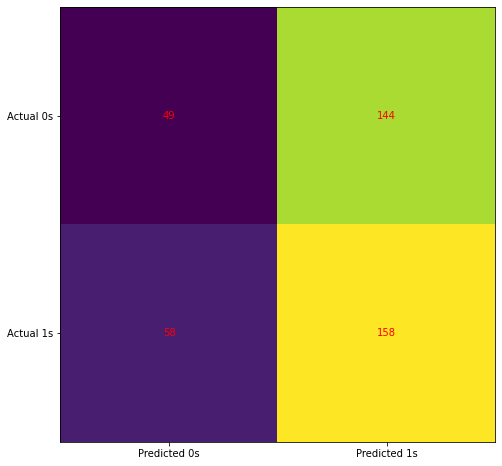

In [55]:
cm_lr = confusion_matrix(y_test,lr_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_lr)
ax.grid(False)# defining parameter range
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_lr[i, j], ha='center', va='center', color='red')

The model has done a fairly better job at detecting real pictures than detecting fake ones.


## Naive Bayes Classifier

In [56]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 0.15199110829529336}

Performing a quick grid search to determine best params.

In [86]:
nb = GaussianNB(var_smoothing= 0.15)
nb.fit(X_train, y_train)
nb.score(X_train, y_train)

0.5502450980392157

In [87]:
nb_pred = nb.predict(X_test)

In [88]:
acc_nb = nb.score(X_test, y_test)
acc_nb

0.5281173594132029

In [89]:
f1_nb = f1_score(y_test, nb_pred)
f1_nb

0.5720620842572062

In [90]:
cr_nb = classification_report(y_test,nb_pred )
print(cr_nb)

              precision    recall  f1-score   support

           0       0.50      0.45      0.47       193
           1       0.55      0.60      0.57       216

    accuracy                           0.53       409
   macro avg       0.52      0.52      0.52       409
weighted avg       0.53      0.53      0.53       409



The results of Naive Bayes are more balances then those of Logistic regression, although the accuracy droped a bit with NB, its F1 score, ie average of precision and recall, have balances out.

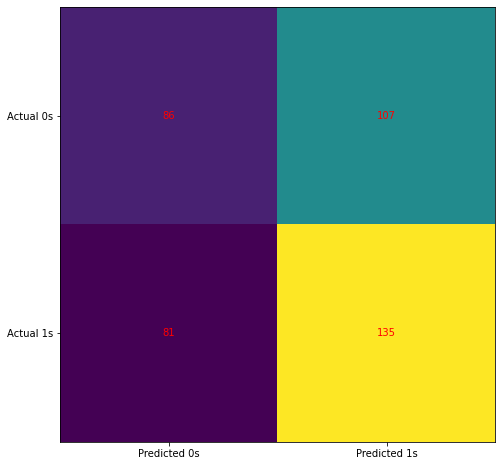

In [62]:
cm_nb = confusion_matrix(y_test,nb_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_nb)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_nb[i, j], ha='center', va='center', color='red')

The confusion matrix shows slightly better performance on detecting real photos then fake one.

## Support Vector Machines

In [63]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   0.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   0.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.531 total time=   0.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.531 total time=   0.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.531 total time=   0.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.529 total time=   0.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.529 total time=   0.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.531 total time=   0.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.531 total time=   0.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.531 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.529 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.529 total time=   0.5s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.531 total time=   0.5s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.531 total time=   0.5s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.531 total time=   0.5s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.529 total time=   0.5s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.529 total time=   0.5s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.531 total time=   0.5s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.531 total time=   0.5s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.528 total time=   0.6s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.532 total time=   0.5s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.526 total time=   0.6s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.525 total time=   0.5s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

Here I ran a grid serch for the parameters

In [64]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [65]:
svc = SVC(C= 10, gamma = 0.0001, kernel= 'rbf')

In [66]:
svc.fit(X_train, y_train)

SVC(C=10, gamma=0.0001)

In [67]:
svc.score(X_train, y_train)

0.7083333333333334

In [68]:
svc_pred = svc.predict(X_test)

In [69]:
acc_svc = svc.score(X_test, y_test)
acc_svc

0.58679706601467

In [70]:
f1_svc = f1_score(y_test, svc_pred)
f1_svc

0.6442105263157895

In [71]:
cr_svc = classification_report(y_test,svc_pred )
print(cr_svc)

              precision    recall  f1-score   support

           0       0.58      0.45      0.51       193
           1       0.59      0.71      0.64       216

    accuracy                           0.59       409
   macro avg       0.59      0.58      0.58       409
weighted avg       0.59      0.59      0.58       409



The performance of SVC is higher than the baseline model for both fake and real pictures, the precision is almost the same for both classes but recall is better for real photos

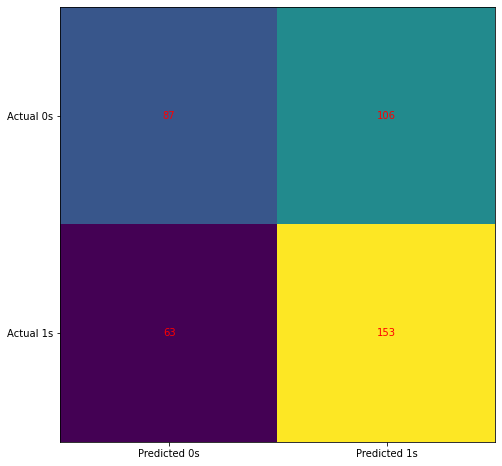

In [72]:
cm_svc = confusion_matrix(y_test,svc_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_svc)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_svc[i, j], ha='center', va='center', color='red')

The Classification report shows more correct guesses than wrong one for both classes, which is a step up from only being able to detect real photos like the models before did.

## XGBoost

In [73]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [74]:
xgb.fit(X_train, y_train)

c:\users\imane\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\imane\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:53:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:53:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.02, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=600, n_jobs=1, nthread=1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=True,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [75]:
xgb.score(X_train, y_train)

0.9993872549019608

In [76]:
xgb_pred = xgb.predict(X_test)

c:\users\imane\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [77]:
acc_xgb = xgb.score(X_test, y_test)

In [78]:
f1_xgb = f1_score(y_test, xgb_pred)
f1_xgb

0.5887445887445888

In [79]:
cr_xgb = classification_report(y_test,xgb_pred )
print(cr_xgb)

              precision    recall  f1-score   support

           0       0.51      0.43      0.47       193
           1       0.55      0.63      0.59       216

    accuracy                           0.54       409
   macro avg       0.53      0.53      0.53       409
weighted avg       0.53      0.54      0.53       409



The accuracy of XGB is almost 1 on the training data, which means that the algo has most probably overfit the training data, its accuracy on the test set is much more reasonable. In terms of F1 score, it's average and slightly better for detecting real pictures.

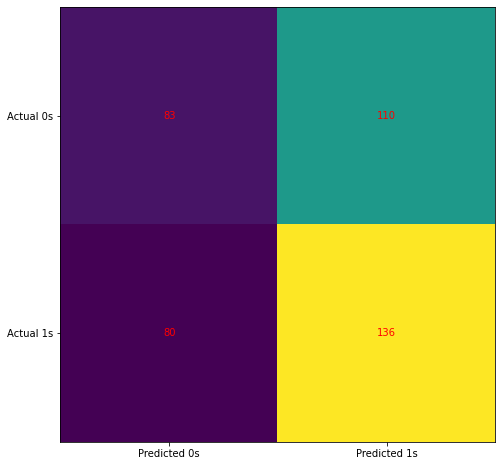

In [80]:
cm_xgb = confusion_matrix(y_test,xgb_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_xgb)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_xgb[i, j], ha='center', va='center', color='red')

## K Nearest Neighbour

In [81]:
knn = KNeighborsClassifier()

In [82]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [83]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

In [84]:
grid_search = grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [85]:
grid_search.best_params_

{'n_neighbors': 15}

The grid search has determined 20 neighbours to be the best parameter.

In [91]:
knn = KNeighborsClassifier(n_neighbors = 15)

In [92]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [93]:
knn.score(X_train, y_train)

0.616421568627451

In [94]:
knn_pred = knn.predict(X_test)

In [95]:
acc_knn = knn.score(X_test, y_test)

In [96]:
f1_knn = f1_score(y_test, knn_pred)
f1_knn

0.5899581589958159

In [97]:
cr_knn = classification_report(y_test,knn_pred )
print(cr_knn)

              precision    recall  f1-score   support

           0       0.49      0.37      0.42       193
           1       0.54      0.65      0.59       216

    accuracy                           0.52       409
   macro avg       0.51      0.51      0.51       409
weighted avg       0.52      0.52      0.51       409



The accuracy of KNN is average as well as its F1 score, although it has done slightly better at detecting real pictures.

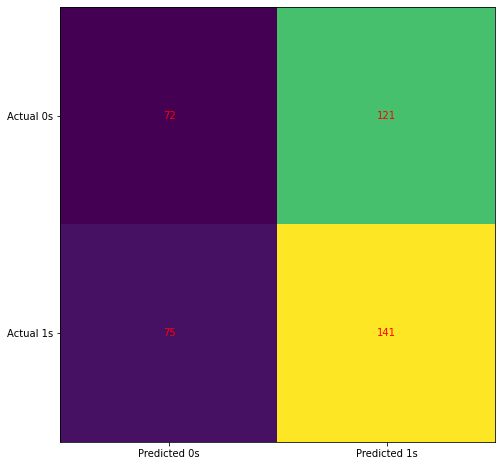

In [98]:
cm_knn = confusion_matrix(y_test,knn_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_knn)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_knn[i, j], ha='center', va='center', color='red')

## Decision Tree Classifier

In [99]:
dec_tree = DecisionTreeClassifier()

In [100]:
params = {"criterion": ["gini"],
       "max_depth": range(4,6),
       "min_samples_split": range(30, 35),
       "min_samples_leaf": range(75,80)}

In [101]:
grid = GridSearchCV(dec_tree, param_grid = params)

In [102]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': range(4, 6),
                         'min_samples_leaf': range(75, 80),
                         'min_samples_split': range(30, 35)})

In [103]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 76,
 'min_samples_split': 31}

In [104]:
tree = DecisionTreeClassifier(criterion = "gini", max_depth = 4,min_samples_leaf = 76, min_samples_split = 31)

In [105]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=76, min_samples_split=31)

In [106]:
tree.score(X_train, y_train)

0.5906862745098039

In [107]:
tree_pred = tree.predict(X_test)

In [108]:
acc_tree = tree.score(X_test, y_test)
acc_tree

0.5427872860635696

In [109]:
f1_tree = f1_score(y_test, tree_pred)
f1_tree

0.6504672897196262

In [110]:
cr_tree = classification_report(y_test,tree_pred )
print(cr_tree)

              precision    recall  f1-score   support

           0       0.53      0.25      0.34       193
           1       0.55      0.81      0.65       216

    accuracy                           0.54       409
   macro avg       0.54      0.53      0.49       409
weighted avg       0.54      0.54      0.50       409



The combined F1 score for both classes is higher than average although the Decision Tree also did better on real pictures than detecting fake one, the model didn't overfit and its accuracy on the test set is average.

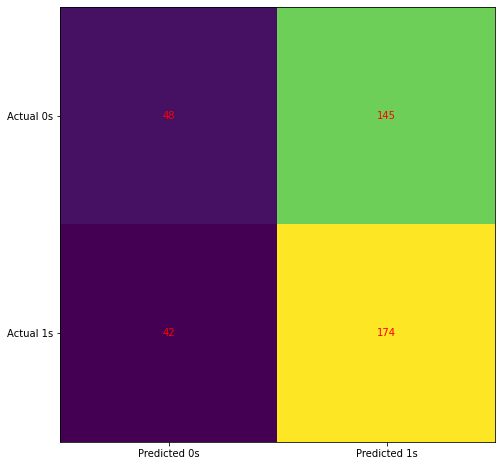

In [111]:
cm_tree = confusion_matrix(y_test,tree_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_tree)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_tree[i, j], ha='center', va='center', color='red')

The Decision tree did also better at detecting real images

## Models comparision

In [112]:
acc = [acc_lr, acc_nb, acc_svc, acc_xgb, acc_knn, acc_tree]
f1 = [f1_lr, f1_nb, f1_svc, f1_xgb, f1_knn, f1_tree]
models = ["LR", "NB", "SVC", "XGB", "KNN", "DT"]

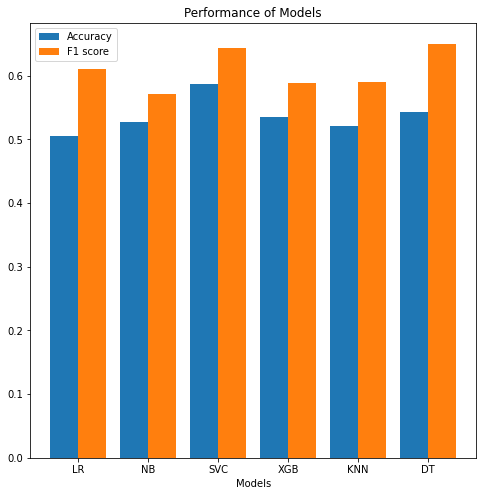

In [113]:
X_axis = np.arange(len(models))
plt.figure(figsize=(8, 8))  
plt.bar(X_axis - 0.2, acc , 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, f1, 0.4, label = 'F1 score')
  
plt.xticks(X_axis, models)
plt.xlabel("Models")
plt.title("Performance of Models")
plt.legend()

The above plot shows the performance of the different algorithms used. Now from first glance, it seems that SVC is doing the best job because eventhough its accuracy isn't as high as that of Decision tree, but its F1 score compensates for that. If I'm to choose I would pick SVM.

## Conclusion

In this notebook I tried to build models capable of detecting fake pictures. Firstly, I tried to reduce the dimensionality of the images using PCA, then I attempted with different classification algorithms. The results of my models are average if not too bad (like XGB and SVC), and I can argue its because of :
- The method of pre-processing I used: maybe the PCA that kept only half of the information  in the picture has let go of so much information necessary for the models to differentiate between the two classes.
- Machine learning algorithms are not able to handle well this particular problem and that neural networks should be given a shot.